# CS381/780 Data Analytics Final Project

### Due on 5/19/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an original student performance dataset provided on Kaggle

https://www.kaggle.com/impapan/student-performance-data-set


### I have modified the original dataset slightly, removed some attributes and include the first term grade from the language course


In [5]:
df = pd.read_csv("student_performance_modified.csv")
df.head()

NameError: name 'pd' is not defined

In [5]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health',
       'Math_FinalG3'],
      dtype='object')

In [6]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [7]:
df['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

### First we replace the Math_FinalG3 by a binary label to indicate underperformance

In [8]:
df['underperformance'] = df['Math_FinalG3'].apply(lambda x: 1 if x < 9 else 0)
df = df.drop(['Math_FinalG3'], axis=1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,0


### Your task in the final project is build the best predictive model to predict who would underperform in their final Math Grade so that the school can proactively find ways to help the students

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.

### Math_G1 is the Math Grade in first term and Language_G1 is the first term grade in language. Math_G1 should have a high correlation of the Student Final Math Grade. However, it won't be available at the beginning of the school year

### Therefore, you need to build two sets of models. One set is not to use these G1 varaibles, the others you could. Find out if the language grade will be useful or not in determining the final Math grade

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


<AxesSubplot:xlabel='underperformance', ylabel='count'>

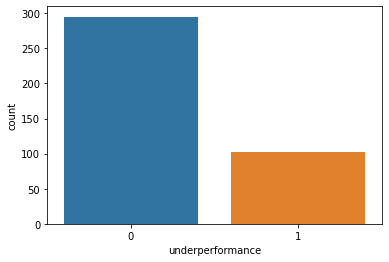

In [9]:
sns.countplot(df['underperformance'])

Writing down my ideas from what I see.
Someone with many "failures", and "absences" Should do badly.
Someone with bad health, low study time, high travel time, no interent, bad family relationship, goes out alot, has workday alchol consumption 

possibly:
weekday alcohol consumption


In [10]:
df.isnull().any()

age                  True
traveltime          False
studytime           False
failures            False
absences            False
Math_G1              True
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

We have some null values, lets deal with them.

In [11]:
df = df.dropna() 
#drop the null values we just found.

<AxesSubplot:ylabel='age'>

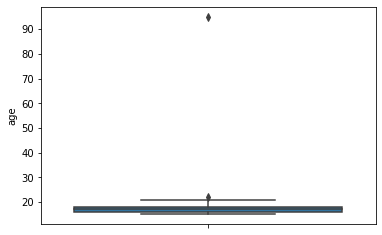

In [12]:
sns.boxplot(y=df['age'])
#Looks like soeone is in school at the age of 90. That doesn't seem right.

<AxesSubplot:ylabel='age'>

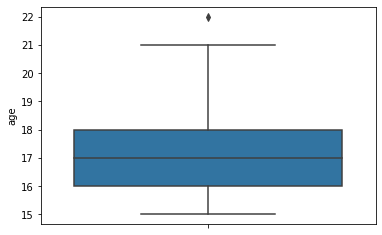

In [13]:
df = df[df['age'] < 90]
sns.boxplot(y=df['age'])
#we can see that there is someone of age 22, but in highschool that is the maximum age for free highschool in the states.
#I'm going to take the assumption that the data is correct now.

<AxesSubplot:ylabel='Math_G1'>

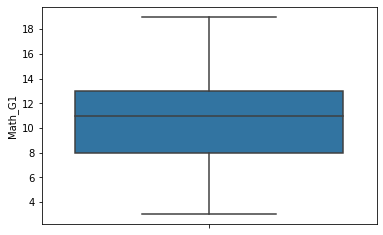

In [14]:
sns.boxplot(y=df['Math_G1'])

Apply dummy variables

For mjob/fjob the cases will be 

mjob/fjob dummy converison


0 = teacher

1 = other

2 = services

3 = health

4 = at home

The other columns are just binary yes or no dummy variables.

In [15]:
df = df.join(pd.get_dummies(df['Mjob'], prefix='Mjob'))
df = df.join(pd.get_dummies(df['Fjob'], prefix='Fjob'))
df = df.join(pd.get_dummies(df['famsize']))
df = df.join(pd.get_dummies(df['sex']))
df = df.join(pd.get_dummies(df['Pstatus']))
df = df.join(pd.get_dummies(df['address']))
df

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,Fjob_services,Fjob_teacher,GT3,LE3,F,M,A,T,R,U
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,0,1,1,0,1,0,1,0,0,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,20.0,1,2,2,11,9.0,14,M,U,LE3,...,1,0,0,1,0,1,1,0,0,1
392,17.0,2,1,0,3,14.0,11,M,U,LE3,...,1,0,0,1,0,1,0,1,0,1
393,21.0,1,1,3,3,10.0,12,M,R,GT3,...,0,0,1,0,0,1,0,1,1,0
394,18.0,3,1,0,0,11.0,14,M,R,LE3,...,0,0,0,1,0,1,0,1,1,0


In [16]:
df = df.drop(['sex', 'famsize', 'address','Pstatus','Mjob', 'Fjob'],axis=1)
df
#f m is female or male
#r u is from address residential or urban
#a t is from pstatus. together or apart marital status

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,F,M,A,T,R,U
0,18.0,2,2,0,6,5.0,0,4,4,yes,...,0,1,1,0,1,0,1,0,0,1
1,17.0,1,2,0,4,5.0,9,1,1,no,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,7.0,12,1,1,yes,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,15.0,14,4,2,no,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,3,3,no,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,20.0,1,2,2,11,9.0,14,2,2,no,...,1,0,0,1,0,1,1,0,0,1
392,17.0,2,1,0,3,14.0,11,3,1,no,...,1,0,0,1,0,1,0,1,0,1
393,21.0,1,1,3,3,10.0,12,1,1,no,...,0,0,1,0,0,1,0,1,1,0
394,18.0,3,1,0,0,11.0,14,3,2,no,...,0,0,0,1,0,1,0,1,1,0


In [17]:
df['paid'] = df['paid'].apply(lambda x:'0' if x == 'no' else 1)
df['activities'] = df['activities'].apply(lambda x:'0' if x == 'no' else 1)
df['internet'] = df['internet'].apply(lambda x:'0' if x == 'no' else 1)
df['higher'] = df['higher'].apply(lambda x:'0' if x == 'no' else 1)
df['schoolsup'] = df['schoolsup'].apply(lambda x:'0' if x == 'no' else 1)
df['famsup'] = df['famsup'].apply(lambda x:'0' if x == 'no' else 1) 
df

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,F,M,A,T,R,U
0,18.0,2,2,0,6,5.0,0,4,4,1,...,0,1,1,0,1,0,1,0,0,1
1,17.0,1,2,0,4,5.0,9,1,1,0,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,7.0,12,1,1,1,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,15.0,14,4,2,0,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,3,3,0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,20.0,1,2,2,11,9.0,14,2,2,0,...,1,0,0,1,0,1,1,0,0,1
392,17.0,2,1,0,3,14.0,11,3,1,0,...,1,0,0,1,0,1,0,1,0,1
393,21.0,1,1,3,3,10.0,12,1,1,0,...,0,0,1,0,0,1,0,1,1,0
394,18.0,3,1,0,0,11.0,14,3,2,0,...,0,0,0,1,0,1,0,1,1,0


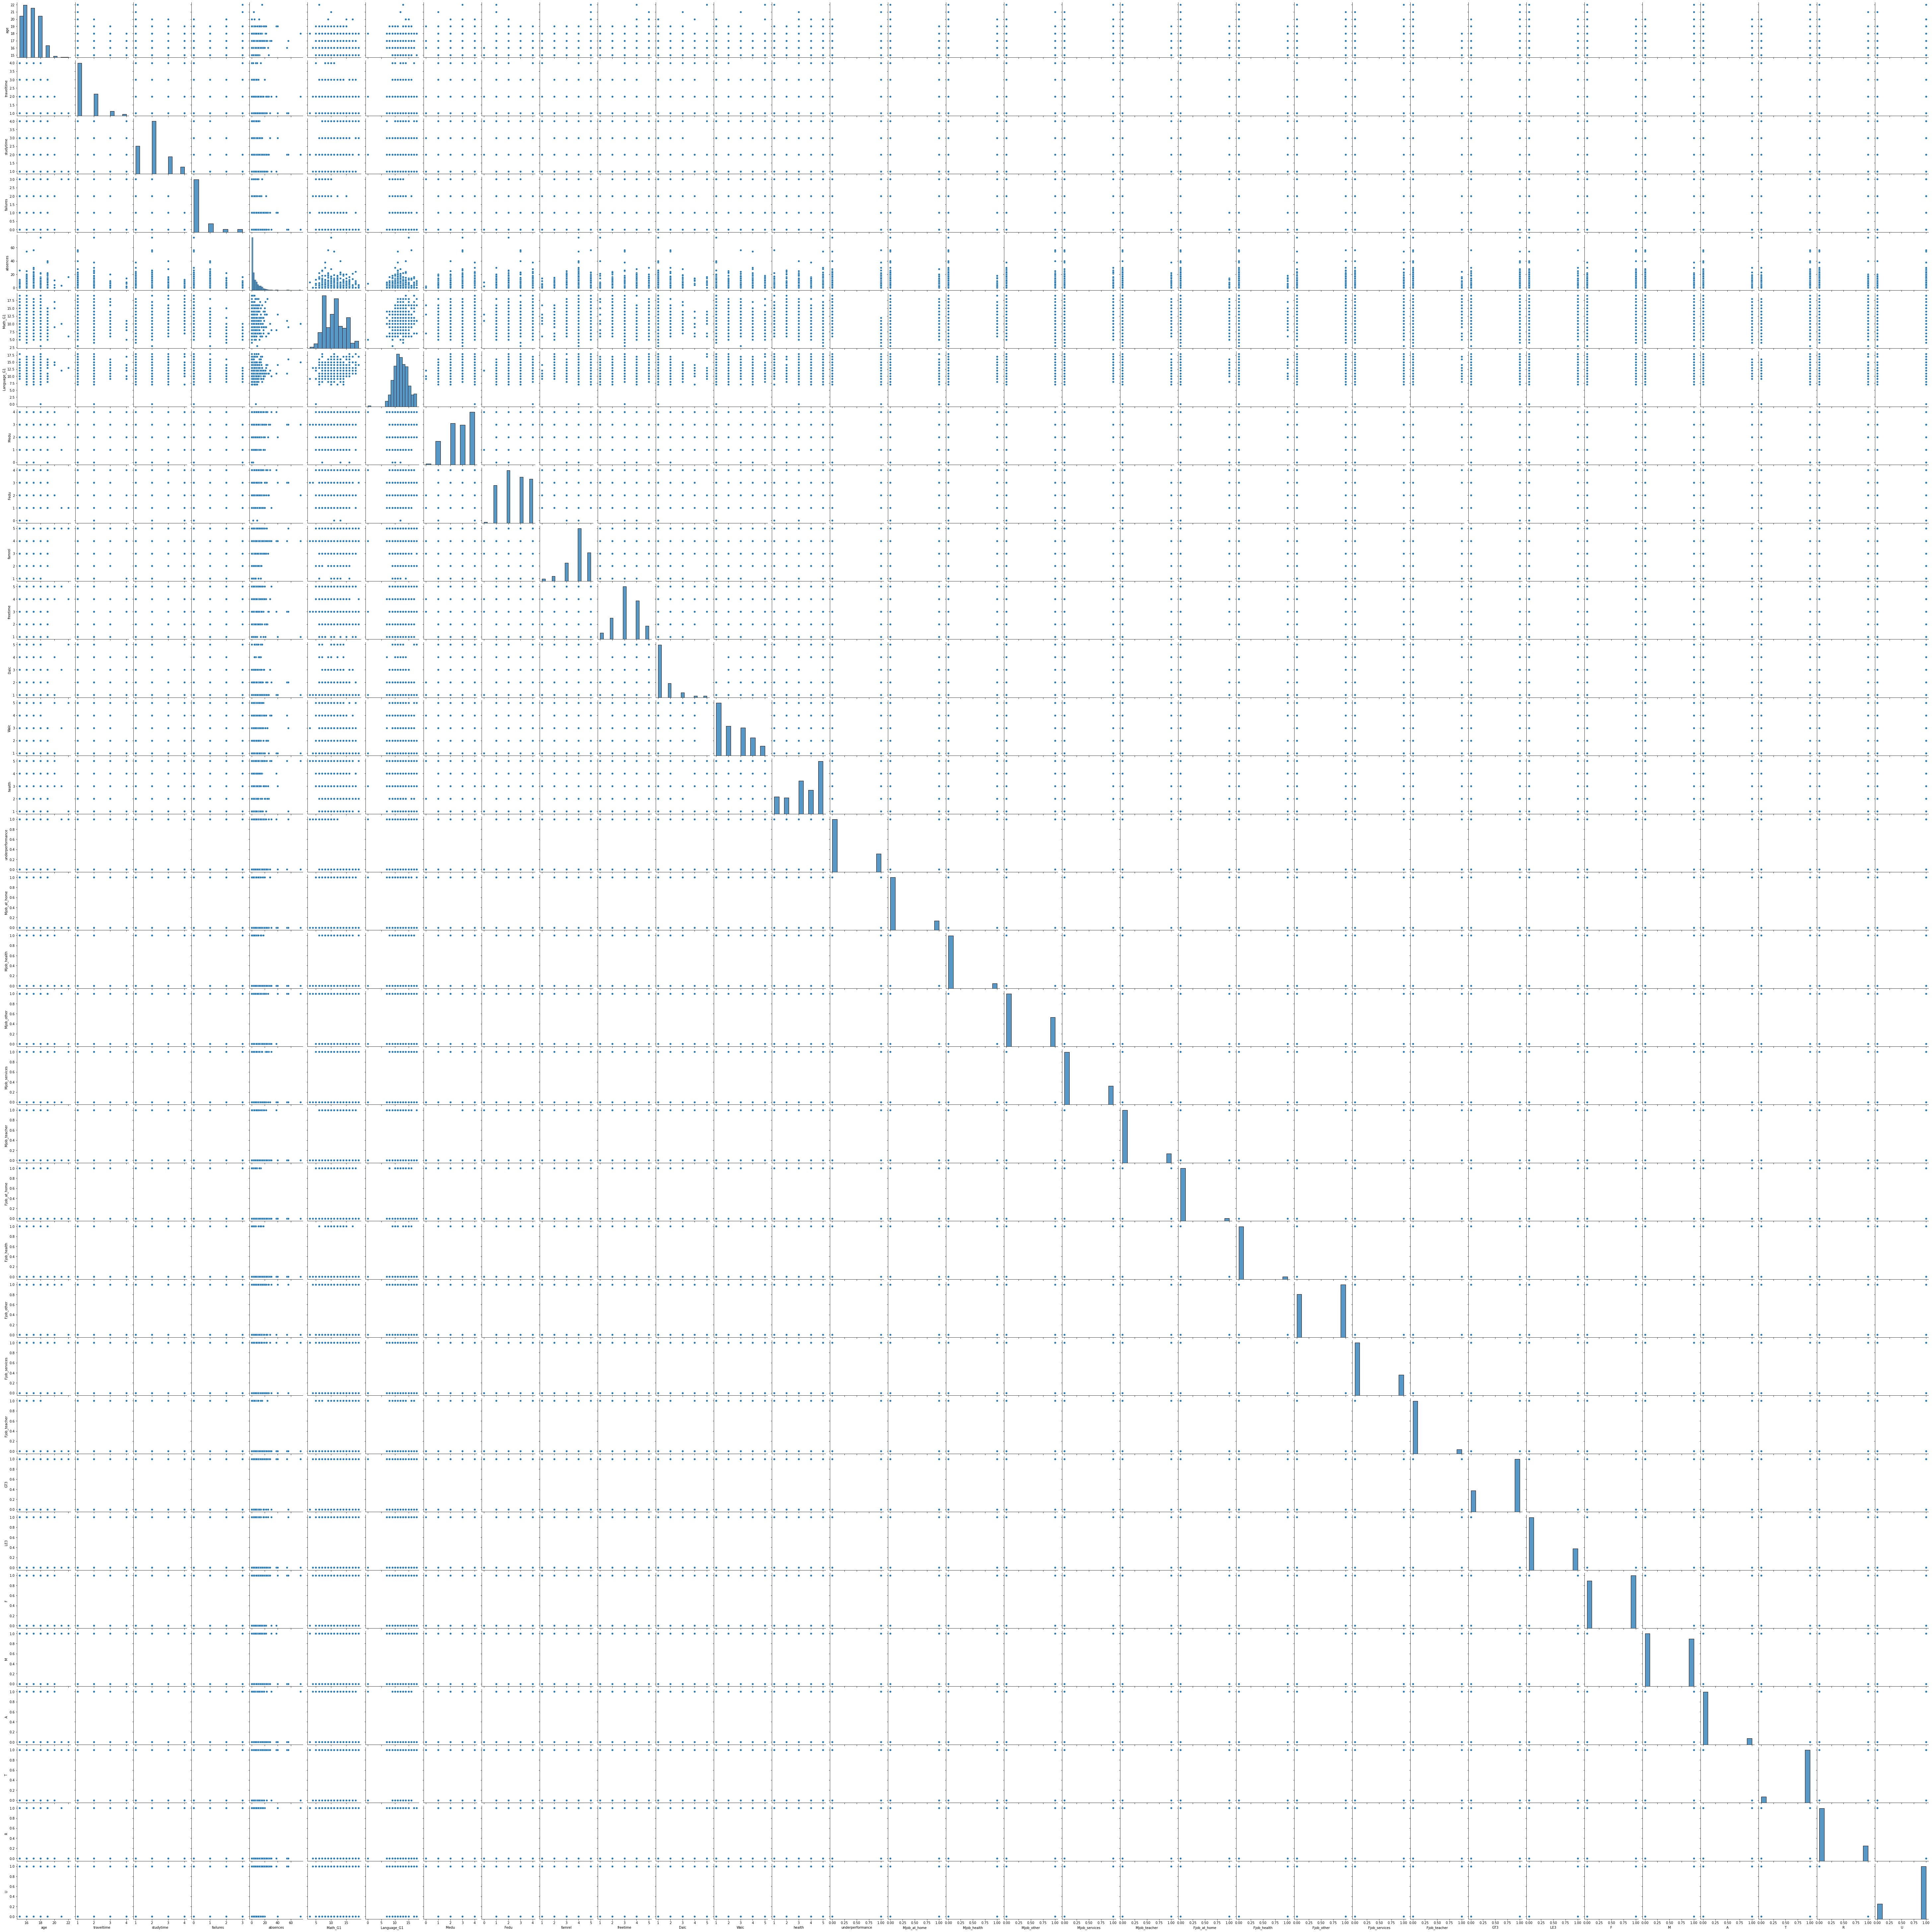

In [111]:
sns.pairplot(df)g

In [112]:
df.corr()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,...,Fjob_services,Fjob_teacher,GT3,LE3,F,M,A,T,R,U
age,1.000000,0.070641,-0.004140,0.243665,0.175230,-0.064081,0.014470,-0.163658,-0.163438,0.053940,...,0.042963,-0.069993,-0.037847,0.037847,0.028606,-0.028606,-0.029598,0.029598,0.146722,-0.146722
traveltime,0.070641,1.000000,-0.100909,0.092239,-0.012944,-0.093040,-0.052465,-0.171639,-0.158194,-0.016808,...,-0.030232,0.014004,-0.063493,0.063493,-0.059722,0.059722,-0.028265,0.028265,0.328096,-0.328096
studytime,-0.004140,-0.100909,1.000000,-0.173563,-0.062700,0.160612,0.062388,0.064944,-0.009175,0.039731,...,0.007162,-0.058225,0.073595,-0.073595,0.306268,-0.306268,-0.024294,0.024294,0.020912,-0.020912
failures,0.243665,0.092239,-0.173563,1.000000,0.063726,-0.354718,-0.112344,-0.236680,-0.250408,-0.044337,...,0.082706,-0.074377,0.015769,-0.015769,-0.044436,0.044436,0.003339,-0.003339,0.078578,-0.078578
absences,0.175230,-0.012944,-0.062700,0.063726,1.000000,-0.031003,0.036896,0.100285,0.024473,-0.044354,...,0.012907,-0.024964,-0.035783,0.035783,0.066962,-0.066962,0.134937,-0.134937,0.027874,-0.027874
Math_G1,-0.064081,-0.093040,0.160612,-0.354718,-0.031003,1.000000,0.314416,0.205341,0.190270,0.022168,...,-0.015093,0.168782,-0.071445,0.071445,-0.091839,0.091839,0.016868,-0.016868,-0.069704,0.069704
Language_G1,0.014470,-0.052465,0.062388,-0.112344,0.036896,0.314416,1.000000,0.114472,0.071270,0.008317,...,-0.043250,0.011457,0.042939,-0.042939,0.046036,-0.046036,0.040494,-0.040494,0.003912,-0.003912
Medu,-0.163658,-0.171639,0.064944,-0.236680,0.100285,0.205341,0.114472,1.000000,0.623455,-0.003914,...,-0.031834,0.259836,0.043068,-0.043068,-0.078228,0.078228,0.123565,-0.123565,-0.138804,0.138804
Fedu,-0.163438,-0.158194,-0.009175,-0.250408,0.024473,0.190270,0.071270,0.623455,1.000000,-0.001370,...,0.021306,0.347203,0.058879,-0.058879,-0.034878,0.034878,0.088730,-0.088730,-0.072178,0.072178
famrel,0.053940,-0.016808,0.039731,-0.044337,-0.044354,0.022168,0.008317,-0.003914,-0.001370,1.000000,...,0.051461,-0.069204,0.022776,-0.022776,-0.058971,0.058971,-0.025179,0.025179,-0.014258,0.014258


In [18]:
corrDF = df.corr()
#corrDF.to_csv('C:/Users/wewt/Desktop/School notes backul/2021 - Spring/381 Pang - DATA/Final project output/dfexport.csv')

In [114]:
corrDF['underperformance'].sort_values(ascending=False)

underperformance    1.000000
failures            0.334230
age                 0.131571
R                   0.101145
Mjob_other          0.079563
GT3                 0.069422
traveltime          0.068868
F                   0.049685
T                   0.049071
Fjob_other          0.046091
Mjob_at_home        0.044863
health              0.039360
Walc                0.023852
freetime            0.023106
Dalc                0.012593
absences            0.009188
Fjob_at_home       -0.004342
Fjob_health        -0.017976
Mjob_services      -0.021047
Fjob_services      -0.021405
Fjob_teacher       -0.033014
famrel             -0.034357
A                  -0.049071
M                  -0.049685
Mjob_teacher       -0.065000
LE3                -0.069422
Mjob_health        -0.077953
studytime          -0.087061
U                  -0.101145
Fedu               -0.112808
Medu               -0.118698
Language_G1        -0.166355
Math_G1            -0.636391
Name: underperformance, dtype: float64

<AxesSubplot:>

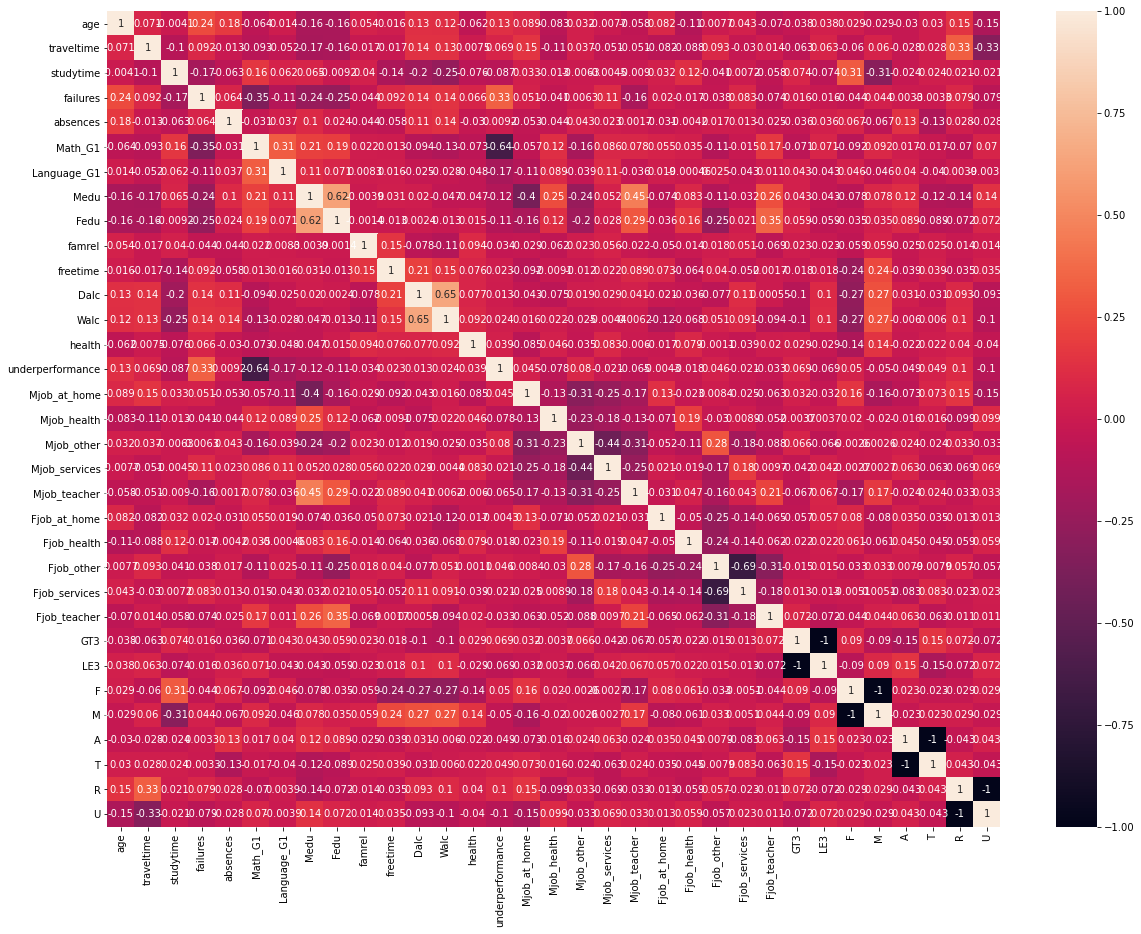

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)

#visualizing this, we can see pretty easily that the more you fail the higher odds you'll underperform. 
#other nice factors can be age, traveltime, studytime, and absences.
#medu and fedu are actually really nice. They are negatively correlated. But that means if you have a highly edjucated mother/father. You'll most likely do well and not underperform.

Looks like past failures is the best variable out of all of them.
contendors:
midtemr grade for model 2
failures
Maybes:



* End of eda, dummy variables, basic exploration, and normalizaiton of numerical features.
* To do: 
* 1: separated data set into training and testing
* 2: tried at least two models and checked their model performance
* 3: performed cross-validations




# Seperating without math_g1 scores, and Language_g1 scores.

In [19]:
tempdf = df
X = tempdf.drop(['underperformance', 'Math_G1', 'Language_G1'], axis=1).to_numpy()
Y = df['underperformance'].to_numpy()
X.reshape(-1,36)
Y.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

-0.34680982387565784
[ 0.03593062  0.00371694 -0.06553067  0.15526194  0.00040186  0.03360389
 -0.01626383  0.04131982  0.0699337  -0.03289383 -0.0174499  -0.14109997
  0.04635842 -0.00773511  0.03128387 -0.03587305  0.00119399  0.00916805
  0.06951682 -0.16264778  0.06676474 -0.00349176  0.02985799 -0.07898365
  0.09404548  0.02718001 -0.02813484 -0.01410699  0.02739523 -0.02739523
  0.03200338 -0.03200338 -0.01794737  0.01794737  0.04377875 -0.04377875]


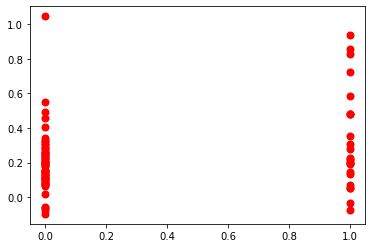

Mean Absolute Error: 0.3518579439587313
Mean Squared Error: 0.20945180992125437
Root Mean Squared Error: 0.4576590542327928
R-squared: 0.009705495667765796


In [24]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
print(model1.intercept_)
print(model1.coef_)
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

### 10-fold Cross Validation


Trial 0, R-squared: 0.04659024270933265,  Slope: [ 0.02804231 -0.03191137 -0.05053404  0.17729881 -0.00243177  0.01369325
 -0.00785291  0.12606271  0.06429317 -0.02858834 -0.01751243 -0.14230863
 -0.01167153 -0.01464149  0.00345516 -0.00303227 -0.00767694  0.01668232
  0.00879786 -0.06518002  0.04586938 -0.04529452  0.05580729  0.02130014
 -0.02880751  0.02441192  0.02050115 -0.0374057   0.00623161 -0.00623161
  0.05140383 -0.05140383 -0.0231901   0.0231901   0.04905713 -0.04905713], Intercept: -0.00739408688520804,  
Trial 1, R-squared: -0.11243381131660879,  Slope: [ 0.02923178  0.03683899 -0.03642403  0.18228602 -0.00361413  0.04140101
  0.00139765  0.14965709  0.08046076 -0.02133343  0.00940917 -0.1945276
  0.03450317 -0.02425054  0.014779    0.00195085 -0.01513695  0.01346067
  0.01120996 -0.09181495  0.09268663 -0.01344625  0.00136461  0.00830387
 -0.05042859  0.04930705  0.02157476 -0.0287571   0.03143635 -0.03143635
  0.04928338 -0.04928338 -0.0620072   0.0620072   0.02195072 -

<AxesSubplot:xlabel='trial'>

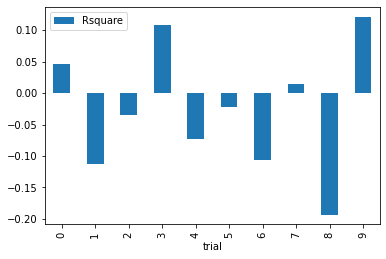

In [25]:
import random
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [26]:
print(rdf['Rsquare'].mean())

-0.025244480865358444


This is a horrible model that doesn't even pass cross validation. With an r-square of .009 to a rsquare mean in ten fold cross validation of -0.01 this is the worst model I have ever created. You can't infer if a student will fail from this model at all.

# Seperating with math_g1 scores, and Language_g1 scores.

In [27]:
tempdf = df
X = tempdf.drop(['underperformance'],axis = 1).to_numpy()
Y = df['underperformance'].to_numpy()
X.reshape(-1,38)
Y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


0.600107988067808
[ 0.02542119  0.00372361  0.00382258  0.05689111  0.00157203 -0.08646085
  0.01274235  0.0233816  -0.00189117 -0.13527171 -0.01075628 -0.04660235
 -0.02310217 -0.02915197  0.05743474 -0.01000127  0.0399011  -0.0319057
 -0.01745348 -0.00458925  0.03464896 -0.04143642  0.00292524  0.02240264
 -0.01854042 -0.04817815  0.05945152 -0.06237176 -0.08124625  0.13234463
  0.01415017 -0.01415017 -0.00824142  0.00824142 -0.02540744  0.02540744
  0.04089092 -0.04089092]


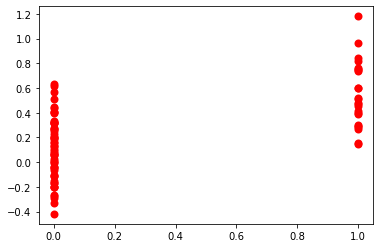

Mean Absolute Error: 0.299904344589461
Mean Squared Error: 0.13542721704707747
Root Mean Squared Error: 0.3680043709619187
R-squared: 0.35969601394635553


In [28]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
print(model1.intercept_)
print(model1.coef_)
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

### 10-fold Cross Validation


Trial 0, R-squared: 0.4425535422215696,  Slope: [ 0.02285823  0.00729127  0.00952612  0.04303725 -0.00206282 -0.08017401
  0.00128655  0.02445257  0.00377519 -0.01910333 -0.02225224 -0.00056513
  0.01587759 -0.01691428  0.01268773 -0.01228382  0.02339138 -0.02303998
 -0.01636636 -0.00054631  0.02673318 -0.01404252  0.00488349  0.0470527
 -0.06462685 -0.02538612  0.0087328  -0.03315817 -0.0468792   0.09669069
  0.0056211  -0.0056211   0.00123197 -0.00123197 -0.05107825  0.05107825
  0.03317969 -0.03317969], Intercept: 0.674189392550999,  
Trial 1, R-squared: 0.29134374070074476,  Slope: [ 0.02250509 -0.00090516  0.00495428  0.07268855  0.00086607 -0.08311325
  0.00948038  0.0304797  -0.0139114  -0.09593028 -0.00555073 -0.04641777
 -0.04726822  0.00134842  0.07003231 -0.02643563  0.0145261  -0.03749111
 -0.00508925 -0.00386892  0.00207064  0.01426287  0.01907215  0.00233897
 -0.03774463 -0.02551581  0.00025697 -0.04024032 -0.03027291  0.09577207
  0.0011885  -0.0011885  -0.02246679  0.02

<AxesSubplot:xlabel='trial'>

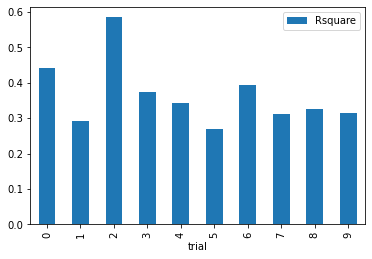

In [29]:
import random
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [30]:
print(rdf['Rsquare'].mean())

0.36513883246732404


We have an r-square of .335 after crossfold validation. A slight decrease from the linearregression model of .359 meaning that my model to predict if a kid needs help is very bad. Still an improvemenet with the data from the midterms.

### Improving the model by being more selective and switching to logistic regression


In [69]:
temp3 = corrDF['underperformance'].sort_values(ascending=False)
for name, data in temp3.items():
        if data < -0.04 or data > 0.04:                
                print(f"{name : <20}{data : ^20}")
     

underperformance            1.0         
failures            0.33423014566717013 
age                 0.13157086083128622 
R                   0.10114451678932078 
Mjob_other          0.07956349595449606 
GT3                 0.06942162820705176 
traveltime          0.06886779305384012 
F                   0.049685199638814466
T                   0.049070834127128475
Fjob_other          0.04609119769801952 
Mjob_at_home        0.04486349442099955 
A                   -0.049070834127128475
M                   -0.04968519963881466
Mjob_teacher        -0.06499999777323412
LE3                 -0.06942162820705176
Mjob_health         -0.07795300334604129
studytime           -0.08706106550830008
U                   -0.10114451678932078
Fedu                -0.11280795477599996
Medu                -0.11869765294898278
Language_G1         -0.16635479510127962
Math_G1             -0.6363911062640848 


In [81]:
tempdf = df
X = df[['failures','age','R','Mjob_other','GT3','traveltime','F','T','Fjob_other','Mjob_at_home','A','M','Mjob_teacher','LE3','Mjob_health','studytime','U','Fedu','Medu']].to_numpy()
Y = df['underperformance'].to_numpy()

In [82]:
X.shape

(395, 19)

In [83]:
X.reshape(-1,19)
Y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)

print(model1.intercept_)
print(model1.coef_)


[-4.45418723]
[[ 0.780261    0.18018229  0.19380314  0.3038094   0.21596449  0.04935853
   0.21953677  0.14920505  0.37403018  0.31793493 -0.14559794 -0.21592966
   0.23511715 -0.21235738 -0.926895   -0.41112635 -0.19019603 -0.02234177
   0.09664399]]


In [84]:
Y_pred = model1.predict(X_test)
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        55
           1       0.86      0.25      0.39        24

    accuracy                           0.76        79
   macro avg       0.80      0.62      0.62        79
weighted avg       0.78      0.76      0.71        79

0.759493670886076


Accuracy: -22.60%


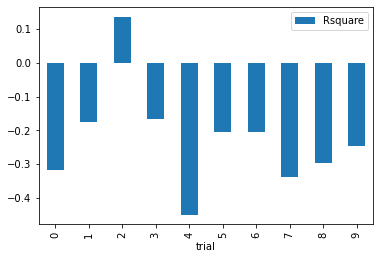

In [85]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')
print("Accuracy: %.2f%%" % (rdf['Rsquare'].mean()*100.0)) 

Unfortunately doesn't pass crossfold validaiton.

### New model with midterm grades


In [86]:
X = df[['failures','age','R','Mjob_other','GT3','traveltime','F','T','Fjob_other','Mjob_at_home','A','M','Mjob_teacher','LE3','Mjob_health','studytime','U','Fedu','Medu','Language_G1','Math_G1']].to_numpy()
Y = df['underperformance'].to_numpy()
X.shape

(395, 21)

In [129]:
X.reshape(-1,21)
Y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)
print(model1.intercept_)
print(model1.coef_)
Y_pred = model1.predict(X_test)
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[0.49508996]
[[ 0.14502447  0.36198263  0.29355629  0.04485354  0.18426665  0.2149868
  -0.02417204  0.14675922 -0.1182601   0.04761017 -0.08095593  0.08997533
   0.03956002 -0.11846336 -0.35614133  0.12896487 -0.227753    0.18750248
   0.04931116  0.06540932 -1.05950616]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90        55
           1       0.84      0.67      0.74        24

    accuracy                           0.86        79
   macro avg       0.85      0.81      0.82        79
weighted avg       0.86      0.86      0.86        79

0.8607594936708861


    With 86% accuracy, It's safe to assume that this models underperformance correctly. With a recall of .95 and an f1 score of .90 for cases when someone won't underperform.

   trial   Rsquare
0      0  0.451389
1      1  0.400380
2      2 -0.049336
3      3  0.197388
4      4  0.221970
5      5  0.218681
6      6  0.059524
7      7  0.369376
8      8  0.244019
9      9 -0.133971
Accuracy: 19.79%


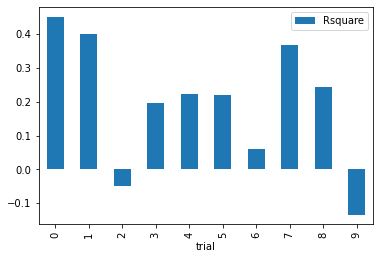

In [88]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')
print(rdf)
print("Accuracy: %.2f%%" % (rdf['Rsquare'].mean()*100.0))

 Unfortunately doesn't pass crossfold validaiton.

### Decision trees with midterm grades

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[46  7]
 [ 8 18]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        53
           1       0.72      0.69      0.71        26

    accuracy                           0.81        79
   macro avg       0.79      0.78      0.78        79
weighted avg       0.81      0.81      0.81        79

0.810126582278481


[Text(194.13750000000002, 207.55636363636364, 'X[20] <= 9.5\ngini = 0.375\nsamples = 316\nvalue = [237, 79]'),
 Text(105.555, 187.7890909090909, 'X[20] <= 7.5\ngini = 0.464\nsamples = 112\nvalue = [41, 71]'),
 Text(37.2, 168.0218181818182, 'X[13] <= 0.5\ngini = 0.226\nsamples = 54\nvalue = [7, 47]'),
 Text(22.32, 148.25454545454545, 'X[1] <= 16.5\ngini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(14.88, 128.48727272727274, 'X[17] <= 2.5\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(7.44, 108.72, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(22.32, 108.72, 'X[17] <= 3.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(14.88, 88.95272727272729, 'X[3] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(7.44, 69.18545454545455, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(22.32, 69.18545454545455, 'X[19] <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(14.88, 49.418181818181836, 'X[20] <= 6.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(7.44, 29.

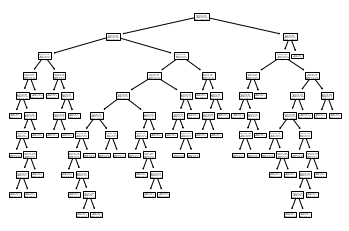

In [142]:
tree.plot_tree(model)

Max_depth, gini and entropy

In [143]:
#entropy
deptharr = [2,3,4]
for d in deptharr:
    print("criterion = entropy" , " depth = ", d)
    model = DecisionTreeClassifier(max_depth=d, criterion='entropy')
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    #print(confusion_matrix(Y_test,predictions))
    print(classification_report(Y_test,predictions))
    print(accuracy_score(Y_test, predictions))

criterion = entropy  depth =  2
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        56
           1       0.88      0.61      0.72        23

    accuracy                           0.86        79
   macro avg       0.87      0.79      0.81        79
weighted avg       0.86      0.86      0.85        79

0.8607594936708861
criterion = entropy  depth =  3
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        56
           1       0.75      0.65      0.70        23

    accuracy                           0.84        79
   macro avg       0.81      0.78      0.79        79
weighted avg       0.83      0.84      0.83        79

0.8354430379746836
criterion = entropy  depth =  4
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        56
           1       0.78      0.61      0.68        23

    accuracy                           0.84     

Pretty good accuracies accross the board with high recall andf f1 scores. Also being supported with avergae scores for when someone is in distressed. This is looking to be a good model, and the numbers support my conclusion.

In [144]:
#gini
deptharr = [2,3,4]
for d in deptharr:
    print("criterion = gini" , " depth = ", d)
    model = DecisionTreeClassifier(max_depth=d, criterion='gini')
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    #print(confusion_matrix(Y_test,predictions))
    print(classification_report(Y_test,predictions))
    print(accuracy_score(Y_test, predictions))

criterion = gini  depth =  2
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        56
           1       0.88      0.61      0.72        23

    accuracy                           0.86        79
   macro avg       0.87      0.79      0.81        79
weighted avg       0.86      0.86      0.85        79

0.8607594936708861
criterion = gini  depth =  3
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        56
           1       0.79      0.65      0.71        23

    accuracy                           0.85        79
   macro avg       0.83      0.79      0.81        79
weighted avg       0.84      0.85      0.84        79

0.8481012658227848
criterion = gini  depth =  4
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        56
           1       0.84      0.70      0.76        23

    accuracy                           0.87        79
   

Gini seems to be the best choice here. The deeper you go the purer node you get. With a purer node we achieved the highest accuracy of 87%. There is also an insane f1 score in this case. at ddepthss 3 we have an f1 of .91 and .72. But on depth 3 we see a f1 score of .90 and .71. Somehow at depth 4 we got an f1 score of .91 and .76 which is higher than depth 2. Meaning that the model is better the purer the nodes are.

[Text(167.4, 181.2, 'X[20] <= 9.5\ngini = 0.375\nsamples = 316\nvalue = [237, 79]'),
 Text(83.7, 108.72, 'X[20] <= 7.5\ngini = 0.464\nsamples = 112\nvalue = [41, 71]'),
 Text(41.85, 36.23999999999998, 'gini = 0.226\nsamples = 54\nvalue = [7, 47]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.485\nsamples = 58\nvalue = [34, 24]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 2.5\ngini = 0.075\nsamples = 204\nvalue = [196, 8]'),
 Text(209.25, 36.23999999999998, 'gini = 0.067\nsamples = 203\nvalue = [196, 7]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

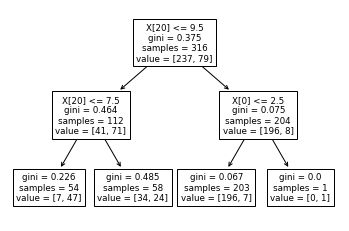

In [145]:
model1 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model1.fit(X_train, Y_train)
model2 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model2.fit(X_train, Y_train)
model3 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model3.fit(X_train, Y_train)
tree.plot_tree(model1)

[Text(193.15384615384616, 190.26, 'X[20] <= 9.5\ngini = 0.375\nsamples = 316\nvalue = [237, 79]'),
 Text(103.01538461538462, 135.9, 'X[20] <= 7.5\ngini = 0.464\nsamples = 112\nvalue = [41, 71]'),
 Text(51.50769230769231, 81.53999999999999, 'X[4] <= 0.5\ngini = 0.226\nsamples = 54\nvalue = [7, 47]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(154.52307692307693, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.485\nsamples = 58\nvalue = [34, 24]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.434\nsamples = 44\nvalue = [30, 14]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(283.2923076923077, 135.9, 'X[0] <= 2.5\ngini = 0.075\nsamples = 204\nvalue = [196, 8]'),
 Text(257.53846153846155, 81.53999999999999, 'X[19] <= 9.5\ngini = 0.067\nsamples = 203\nvalue = [196, 7]'),
 Text(231.7846

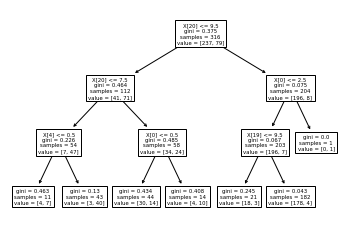

In [146]:
tree.plot_tree(model2)

[Text(202.275, 195.696, 'X[20] <= 9.5\ngini = 0.375\nsamples = 316\nvalue = [237, 79]'),
 Text(111.60000000000001, 152.208, 'X[20] <= 7.5\ngini = 0.464\nsamples = 112\nvalue = [41, 71]'),
 Text(55.800000000000004, 108.72, 'X[4] <= 0.5\ngini = 0.226\nsamples = 54\nvalue = [7, 47]'),
 Text(27.900000000000002, 65.232, 'X[6] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(13.950000000000001, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(41.85, 21.744, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(83.7, 65.232, 'X[1] <= 16.5\ngini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(69.75, 21.744, 'gini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(97.65, 21.744, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(167.4, 108.72, 'X[0] <= 0.5\ngini = 0.485\nsamples = 58\nvalue = [34, 24]'),
 Text(139.5, 65.232, 'X[5] <= 1.5\ngini = 0.434\nsamples = 44\nvalue = [30, 14]'),
 Text(125.55000000000001, 21.744, 'gini = 0.342\nsamples = 32\nvalue = [25, 7]'),
 Text(153.4500

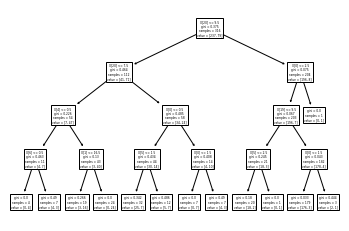

In [147]:
tree.plot_tree(model3)

### Random forest

In [160]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, Y_train)
forest_pred = forest.predict(X_test)
print(classification_report(Y_test, forest_pred))
print(accuracy_score(Y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        57
           1       0.82      0.64      0.72        22

    accuracy                           0.86        79
   macro avg       0.85      0.79      0.81        79
weighted avg       0.86      0.86      0.85        79

0.8607594936708861


Random forest achieved a 86% accuracy. Well done, with high preceision recall and f1-socres. This seems to be a good model aswell. 

# Again but with other thing without midterm grades


In [20]:
df = df.drop('Math_G1',axis=1)
df = df.drop('Language_G1',axis=1)
df

,age,traveltime,studytime,failures,absences,Medu,Fedu,schoolsup,famsup,paid,...,Fjob_services,Fjob_teacher,GT3,LE3,F,M,A,T,R,U
0,18.0,2,2,0,6,4,4,1,0,0,...,0,1,1,0,1,0,1,0,0,1
1,17.0,1,2,0,4,1,1,0,1,0,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,1,1,1,0,1,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,4,2,0,1,1,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,3,3,0,1,1,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,20.0,1,2,2,11,2,2,0,1,1,...,1,0,0,1,0,1,1,0,0,1
392,17.0,2,1,0,3,3,1,0,0,0,...,1,0,0,1,0,1,0,1,0,1
393,21.0,1,1,3,3,1,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
394,18.0,3,1,0,0,3,2,0,0,0,...,0,0,0,1,0,1,0,1,1,0


In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))

In [151]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[49  8]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        57
           1       0.64      0.64      0.64        22

    accuracy                           0.80        79
   macro avg       0.75      0.75      0.75        79
weighted avg       0.80      0.80      0.80        79

0.7974683544303798


79% accurate, expected to be lower without the midterm grades. Although a little less accurate the model seems to be pretty good. With good scores accross the board, especially with an f1 score of .86 and .64. There is also an odd pattern that has appeared. There are repeating numbers on precision, recall, and f1scores, and on the support. I've never seen this before and find it quite amusing

[Text(115.0875, 209.6742857142857, 'X[20] <= 7.5\ngini = 0.378\nsamples = 316\nvalue = [236, 80]'),
 Text(44.05263157894737, 194.14285714285714, 'X[9] <= 0.5\ngini = 0.215\nsamples = 57\nvalue = [7, 50]'),
 Text(26.431578947368422, 178.61142857142858, 'X[1] <= 16.5\ngini = 0.122\nsamples = 46\nvalue = [3, 43]'),
 Text(17.621052631578948, 163.07999999999998, 'X[19] <= 10.5\ngini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(8.810526315789474, 147.54857142857142, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(26.431578947368422, 147.54857142857142, 'X[19] <= 11.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(17.621052631578948, 132.01714285714286, 'X[5] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(8.810526315789474, 116.48571428571428, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(26.431578947368422, 116.48571428571428, 'X[13] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(17.621052631578948, 100.9542857142857, 'gini = 0.0\nsamples = 2\nvalue = 

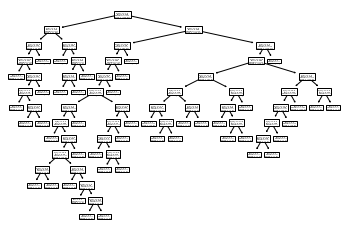

In [152]:
tree.plot_tree(model)

Max_depth, gini and entropy

In [153]:
#entropy
deptharr = [2,3,4]
for d in deptharr:
    print("criterion = entropy" , " depth = ", d)
    model = DecisionTreeClassifier(max_depth=d, criterion='entropy')
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    #print(confusion_matrix(Y_test,predictions))
    print(classification_report(Y_test,predictions))
    print(accuracy_score(Y_test, predictions))

criterion = entropy  depth =  2
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        57
           1       0.85      0.50      0.63        22

    accuracy                           0.84        79
   macro avg       0.84      0.73      0.76        79
weighted avg       0.84      0.84      0.82        79

0.8354430379746836
criterion = entropy  depth =  3
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        57
           1       0.79      0.50      0.61        22

    accuracy                           0.82        79
   macro avg       0.81      0.72      0.75        79
weighted avg       0.82      0.82      0.81        79

0.8227848101265823
criterion = entropy  depth =  4
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        57
           1       0.79      0.50      0.61        22

    accuracy                           0.82     

There is a good accuracy score overall but a declining f1 score of .89 and .63 in depth 2. To .89 and .61 in depths 3 and 4.

In [154]:
#gini
deptharr = [2,3,4]
for d in deptharr:
    print("criterion = gini" , " depth = ", d)
    model = DecisionTreeClassifier(max_depth=d, criterion='gini')
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    #print(confusion_matrix(Y_test,predictions))
    print(classification_report(Y_test,predictions))
    print(accuracy_score(Y_test, predictions))

criterion = gini  depth =  2
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        57
           1       0.85      0.50      0.63        22

    accuracy                           0.84        79
   macro avg       0.84      0.73      0.76        79
weighted avg       0.84      0.84      0.82        79

0.8354430379746836
criterion = gini  depth =  3
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        57
           1       0.85      0.50      0.63        22

    accuracy                           0.84        79
   macro avg       0.84      0.73      0.76        79
weighted avg       0.84      0.84      0.82        79

0.8354430379746836
criterion = gini  depth =  4
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        57
           1       0.85      0.50      0.63        22

    accuracy                           0.84        79
   

Gini seems to be the clear winner again. With high accuracy accross the board. The same is true for f1-score maintinging on each dpeth. at 89%, and 63% respectively. This seems to a much better model than linear, and logistic regression.

[Text(167.4, 181.2, 'X[20] <= 7.5\ngini = 0.378\nsamples = 316\nvalue = [236, 80]'),
 Text(83.7, 108.72, 'X[9] <= 0.5\ngini = 0.215\nsamples = 57\nvalue = [7, 50]'),
 Text(41.85, 36.23999999999998, 'gini = 0.122\nsamples = 46\nvalue = [3, 43]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(251.10000000000002, 108.72, 'X[20] <= 9.5\ngini = 0.205\nsamples = 259\nvalue = [229, 30]'),
 Text(209.25, 36.23999999999998, 'gini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(292.95, 36.23999999999998, 'gini = 0.091\nsamples = 209\nvalue = [199, 10]')]

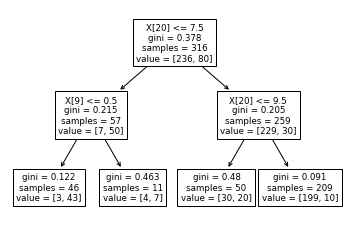

In [155]:
model1 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model1.fit(X_train, Y_train)
model2 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model2.fit(X_train, Y_train)
model3 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model3.fit(X_train, Y_train)
tree.plot_tree(model1)

[Text(167.4, 190.26, 'X[20] <= 7.5\ngini = 0.378\nsamples = 316\nvalue = [236, 80]'),
 Text(83.7, 135.9, 'X[9] <= 0.5\ngini = 0.215\nsamples = 57\nvalue = [7, 50]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 16.5\ngini = 0.122\nsamples = 46\nvalue = [3, 43]'),
 Text(20.925, 27.180000000000007, 'gini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 2.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(104.625, 27.180000000000007, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 135.9, 'X[20] <= 9.5\ngini = 0.205\nsamples = 259\nvalue = [229, 30]'),
 Text(209.25, 81.53999999999999, 'X[19] <= 15.5\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(230.17

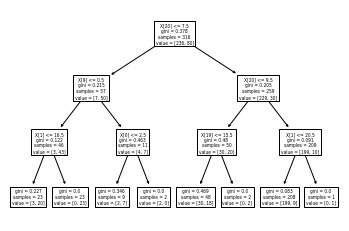

In [156]:
tree.plot_tree(model2)

[Text(176.21052631578948, 195.696, 'X[20] <= 7.5\ngini = 0.378\nsamples = 316\nvalue = [236, 80]'),
 Text(88.10526315789474, 152.208, 'X[9] <= 0.5\ngini = 0.215\nsamples = 57\nvalue = [7, 50]'),
 Text(52.863157894736844, 108.72, 'X[1] <= 16.5\ngini = 0.122\nsamples = 46\nvalue = [3, 43]'),
 Text(35.242105263157896, 65.232, 'X[19] <= 10.5\ngini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(17.621052631578948, 21.744, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(52.863157894736844, 21.744, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(70.48421052631579, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(123.34736842105264, 108.72, 'X[1] <= 15.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(105.72631578947369, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(140.96842105263158, 65.232, 'X[18] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(123.34736842105264, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(158.58947368421053, 2

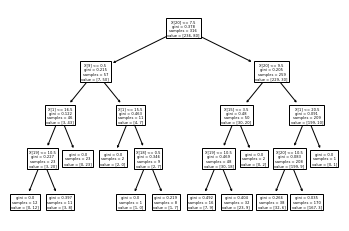

In [157]:
tree.plot_tree(model3)

### Random forest

In [159]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, Y_train)
forest_pred = forest.predict(X_test)
print(classification_report(Y_test, forest_pred))
print(accuracy_score(Y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        57
           1       0.82      0.64      0.72        22

    accuracy                           0.86        79
   macro avg       0.85      0.79      0.81        79
weighted avg       0.86      0.86      0.85        79

0.8607594936708861


Random forest achieved a 86% accuracy. with good overall f1-scores at 91%, and 72%.  I'm happy with the results of the modeling in the end. Although a little shaky at first. With linear, and logistic regression failing me. I'm proud to say that decision trees, and random forest saved the day.

### Conclusions


Linear regression wasn't the choice for any model. Each model failed. Switching to logistic regression seemed to have promising results. With very high accuracy rates of 75%, and 86%. I thought I was onto something good. Unfortunately each time the models didn't pass cross fold validation. Switching to a decision tree proved great results. With a good overall accuracy with or without the midterm grades. The random forest for both cases also proved incredibly good resuslts with an 86% accuracy. Which was the same as the non midterm grades random forest. Proving to be a highly accurate random forest.